# import libraries

In [5]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # Interactive plots (optional)
import plotly.graph_objects as go

# For Jupyter Notebooks (remove if using .py files)
%matplotlib inline

# Set style
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (10, 6)

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier  # Optional, if using XGBoost
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score,
    roc_auc_score,
    ConfusionMatrixDisplay
)
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [9]:
forest=pd.read_csv(r"C:\Users\lakshita\Desktop\datasets\forest_cover_prediction.csv")

In [12]:
forest.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [14]:
forest.tail()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
15115,15116,2607,243,23,258,7,660,170,251,214,...,0,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,...,0,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,...,0,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,...,0,0,0,0,0,0,0,0,0,3
15119,15120,2475,197,34,319,78,270,189,244,164,...,0,0,0,0,0,0,0,0,0,3


In [16]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [22]:
forest.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [26]:
# Check for missing values
missing = forest.isnull().sum()
print("Missing Values:\n", missing[missing > 0])


Missing Values:
 Series([], dtype: int64)


In [30]:
forest.shape

(15120, 56)

# target valribles

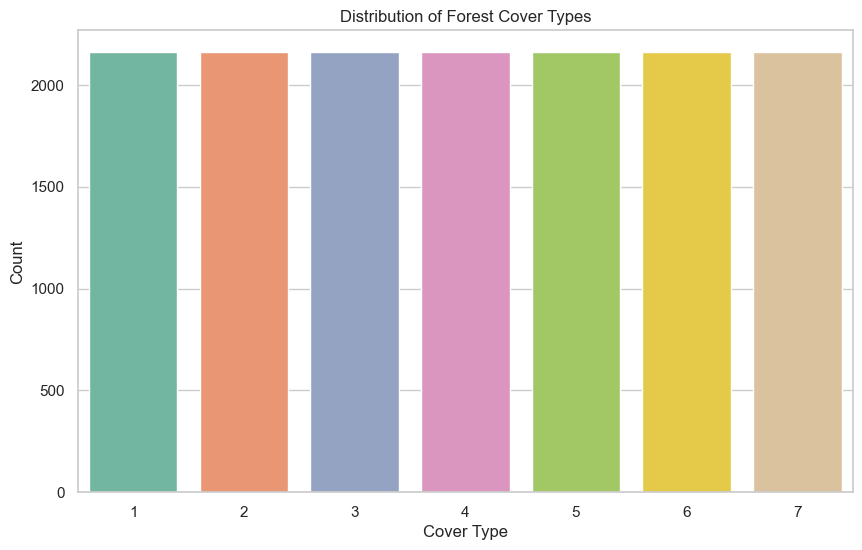

Cover Type Distribution (%):
 Cover_Type
1    14.285714
2    14.285714
3    14.285714
4    14.285714
5    14.285714
6    14.285714
7    14.285714
Name: proportion, dtype: float64


In [39]:
sns.countplot(x='Cover_Type', data=forest, palette='Set2')
plt.title("Distribution of Forest Cover Types")
plt.xlabel("Cover Type")
plt.ylabel("Count")
plt.show()
# Optional: Display percentages
cover_counts = forest['Cover_Type'].value_counts(normalize=True) * 100
print("Cover Type Distribution (%):\n", cover_counts.sort_index())

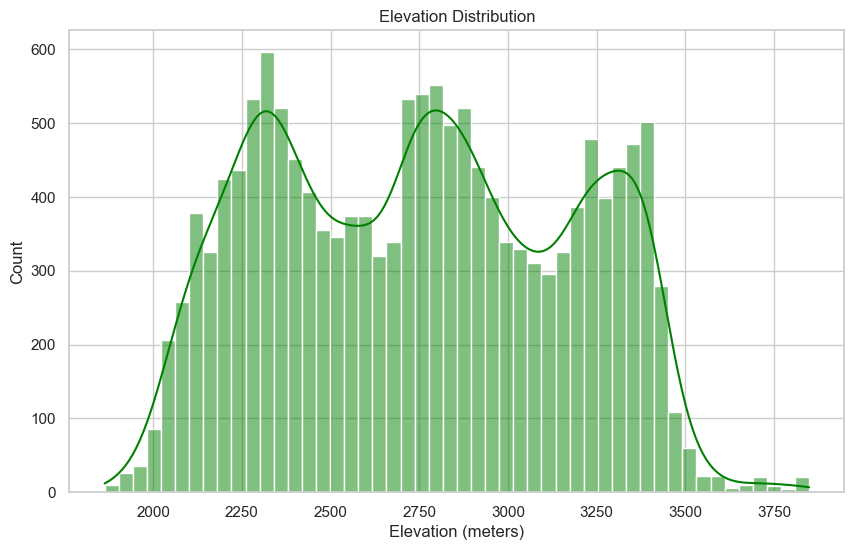

In [43]:
# Elevation distribution
sns.histplot(forest['Elevation'], bins=50, kde=True, color='green')
plt.title('Elevation Distribution')
plt.xlabel('Elevation (meters)')
plt.show()


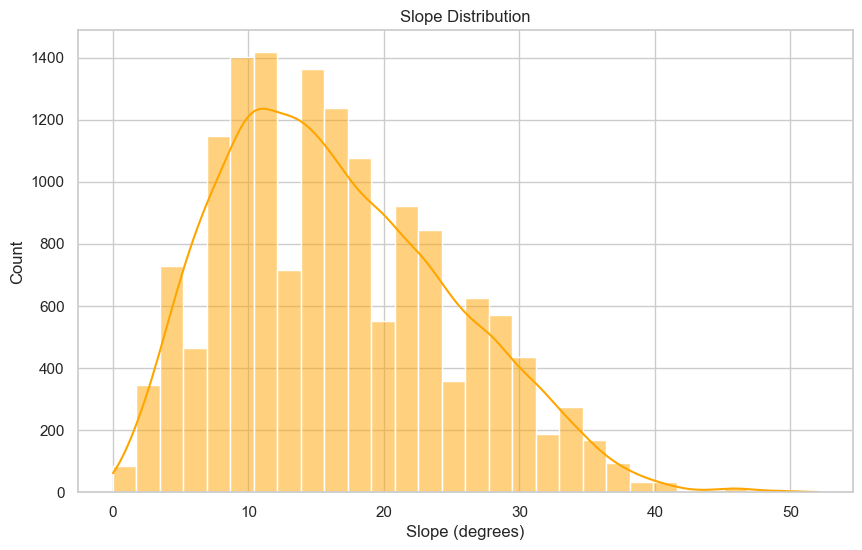

In [47]:
# Slope distribution
sns.histplot(forest['Slope'], bins=30, kde=True, color='orange')
plt.title('Slope Distribution')
plt.xlabel('Slope (degrees)')
plt.show()

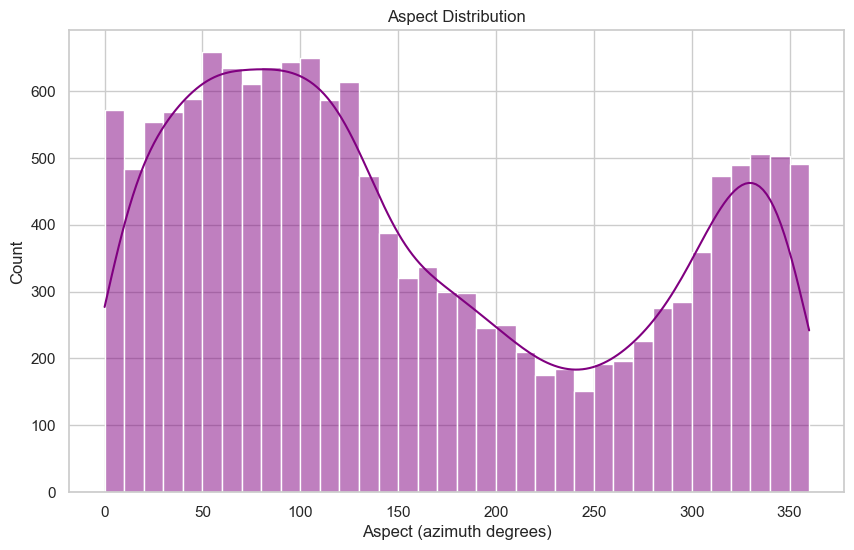

In [51]:
# Aspect distribution
sns.histplot(forest['Aspect'], bins=36, kde=True, color='purple')
plt.title('Aspect Distribution')
plt.xlabel('Aspect (azimuth degrees)')
plt.show()

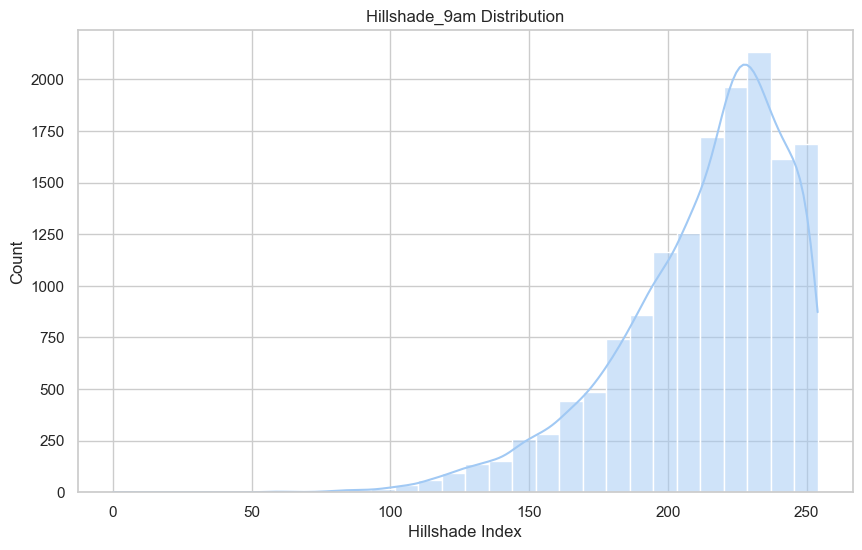

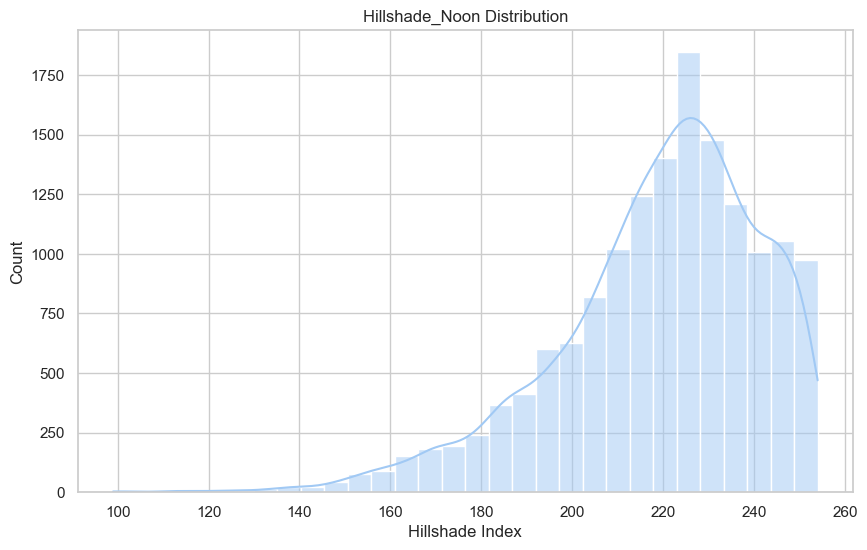

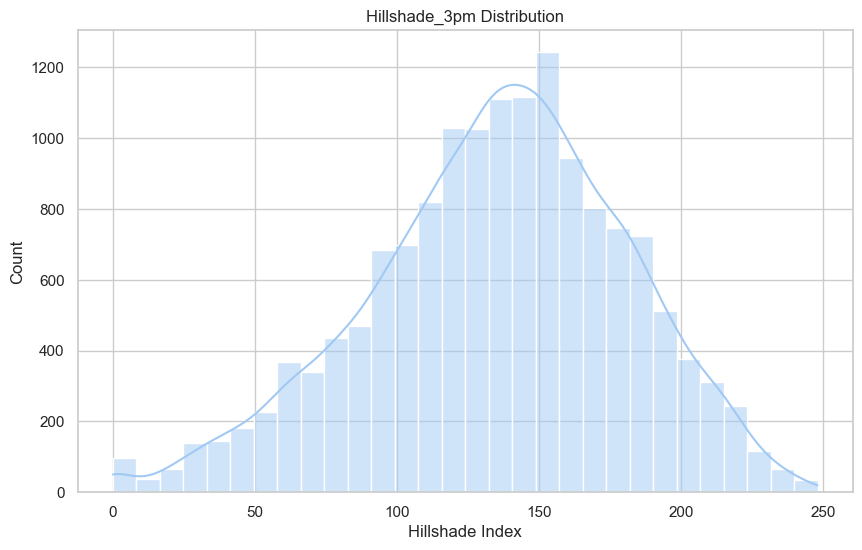

In [53]:
hillshade_features = ['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']
for feature in hillshade_features:
    sns.histplot(forest[feature], bins=30, kde=True)
    plt.title(f'{feature} Distribution')
    plt.xlabel('Hillshade Index')
    plt.show()

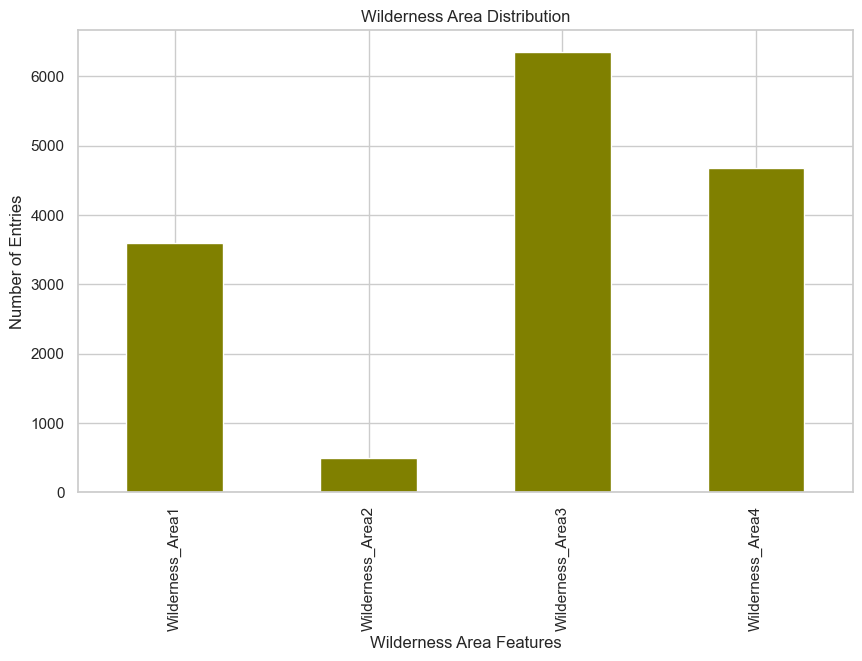

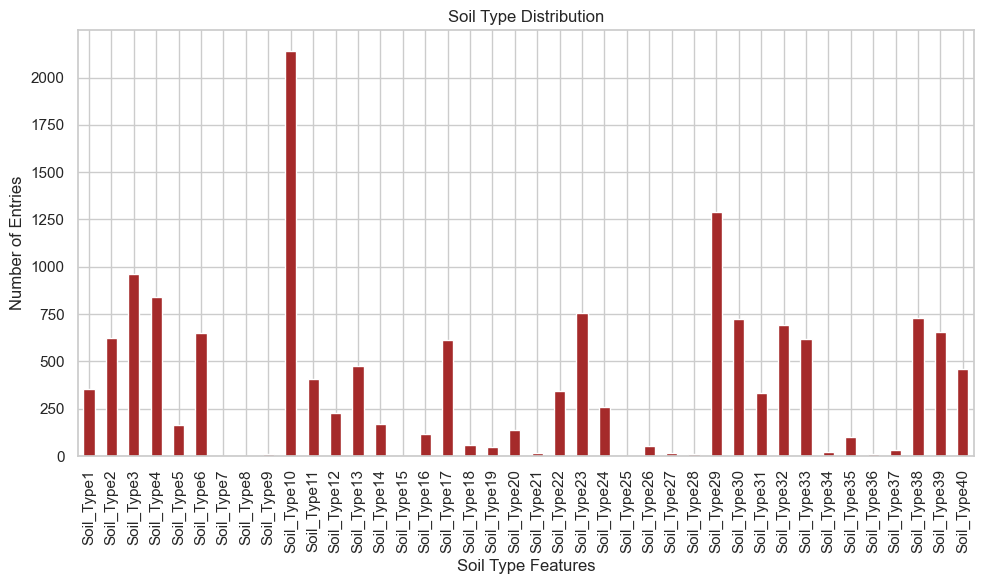

In [57]:
# Wilderness Area
wilderness_cols = [col for col in forest.columns if 'Wilderness_Area' in col]
forest[wilderness_cols].sum().plot(kind='bar', color='olive')
plt.title("Wilderness Area Distribution")
plt.ylabel("Number of Entries")
plt.xlabel("Wilderness Area Features")
plt.show()

# Soil Type
soil_cols = [col for col in forest.columns if 'Soil_Type' in col]
forest[soil_cols].sum().plot(kind='bar', color='brown')
plt.title("Soil Type Distribution")
plt.ylabel("Number of Entries")
plt.xlabel("Soil Type Features")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


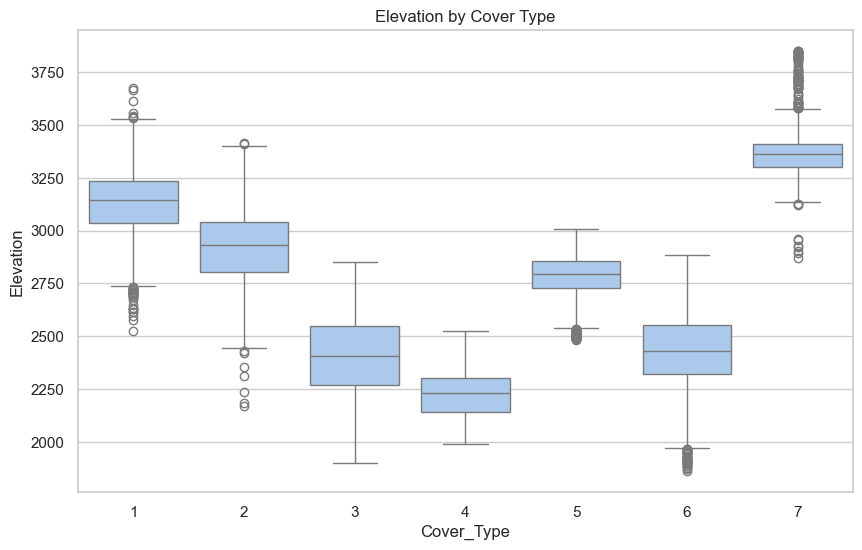

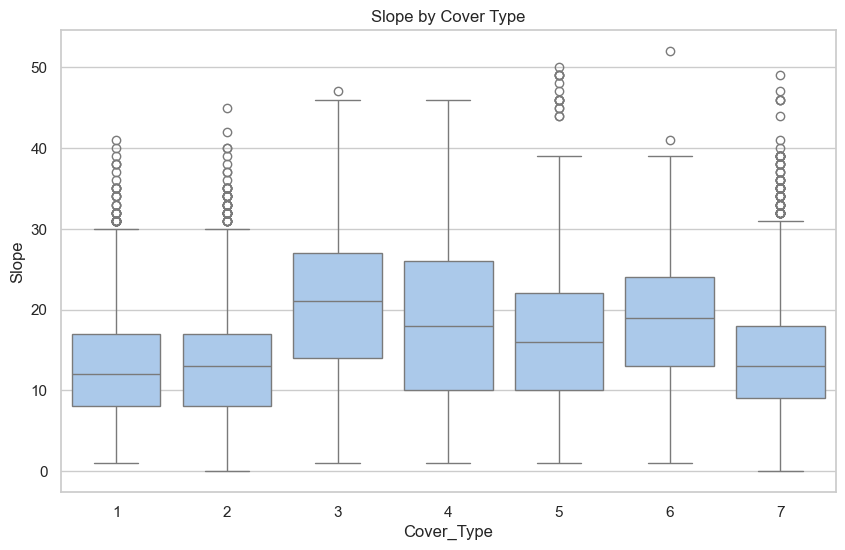

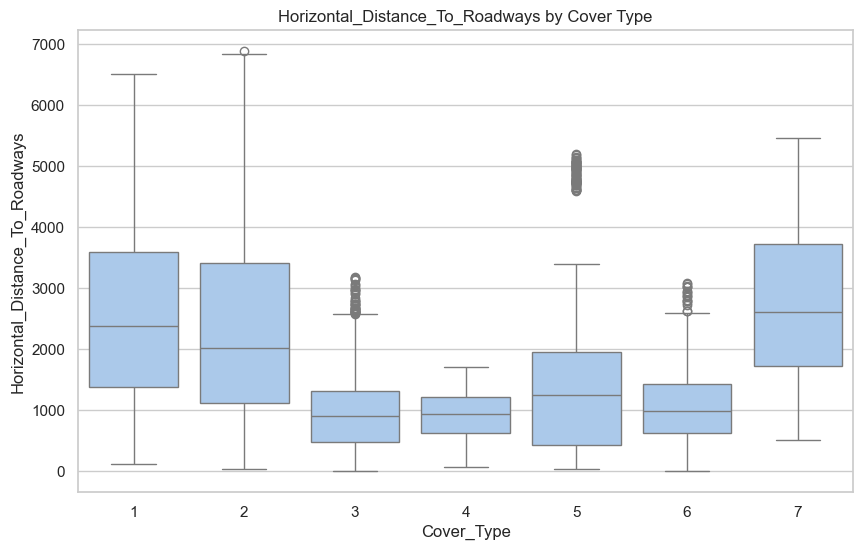

In [59]:
key_features = ['Elevation', 'Slope', 'Horizontal_Distance_To_Roadways']

for feature in key_features:
    sns.boxplot(x='Cover_Type', y=feature, data=forest)
    plt.title(f'{feature} by Cover Type')
    plt.show()


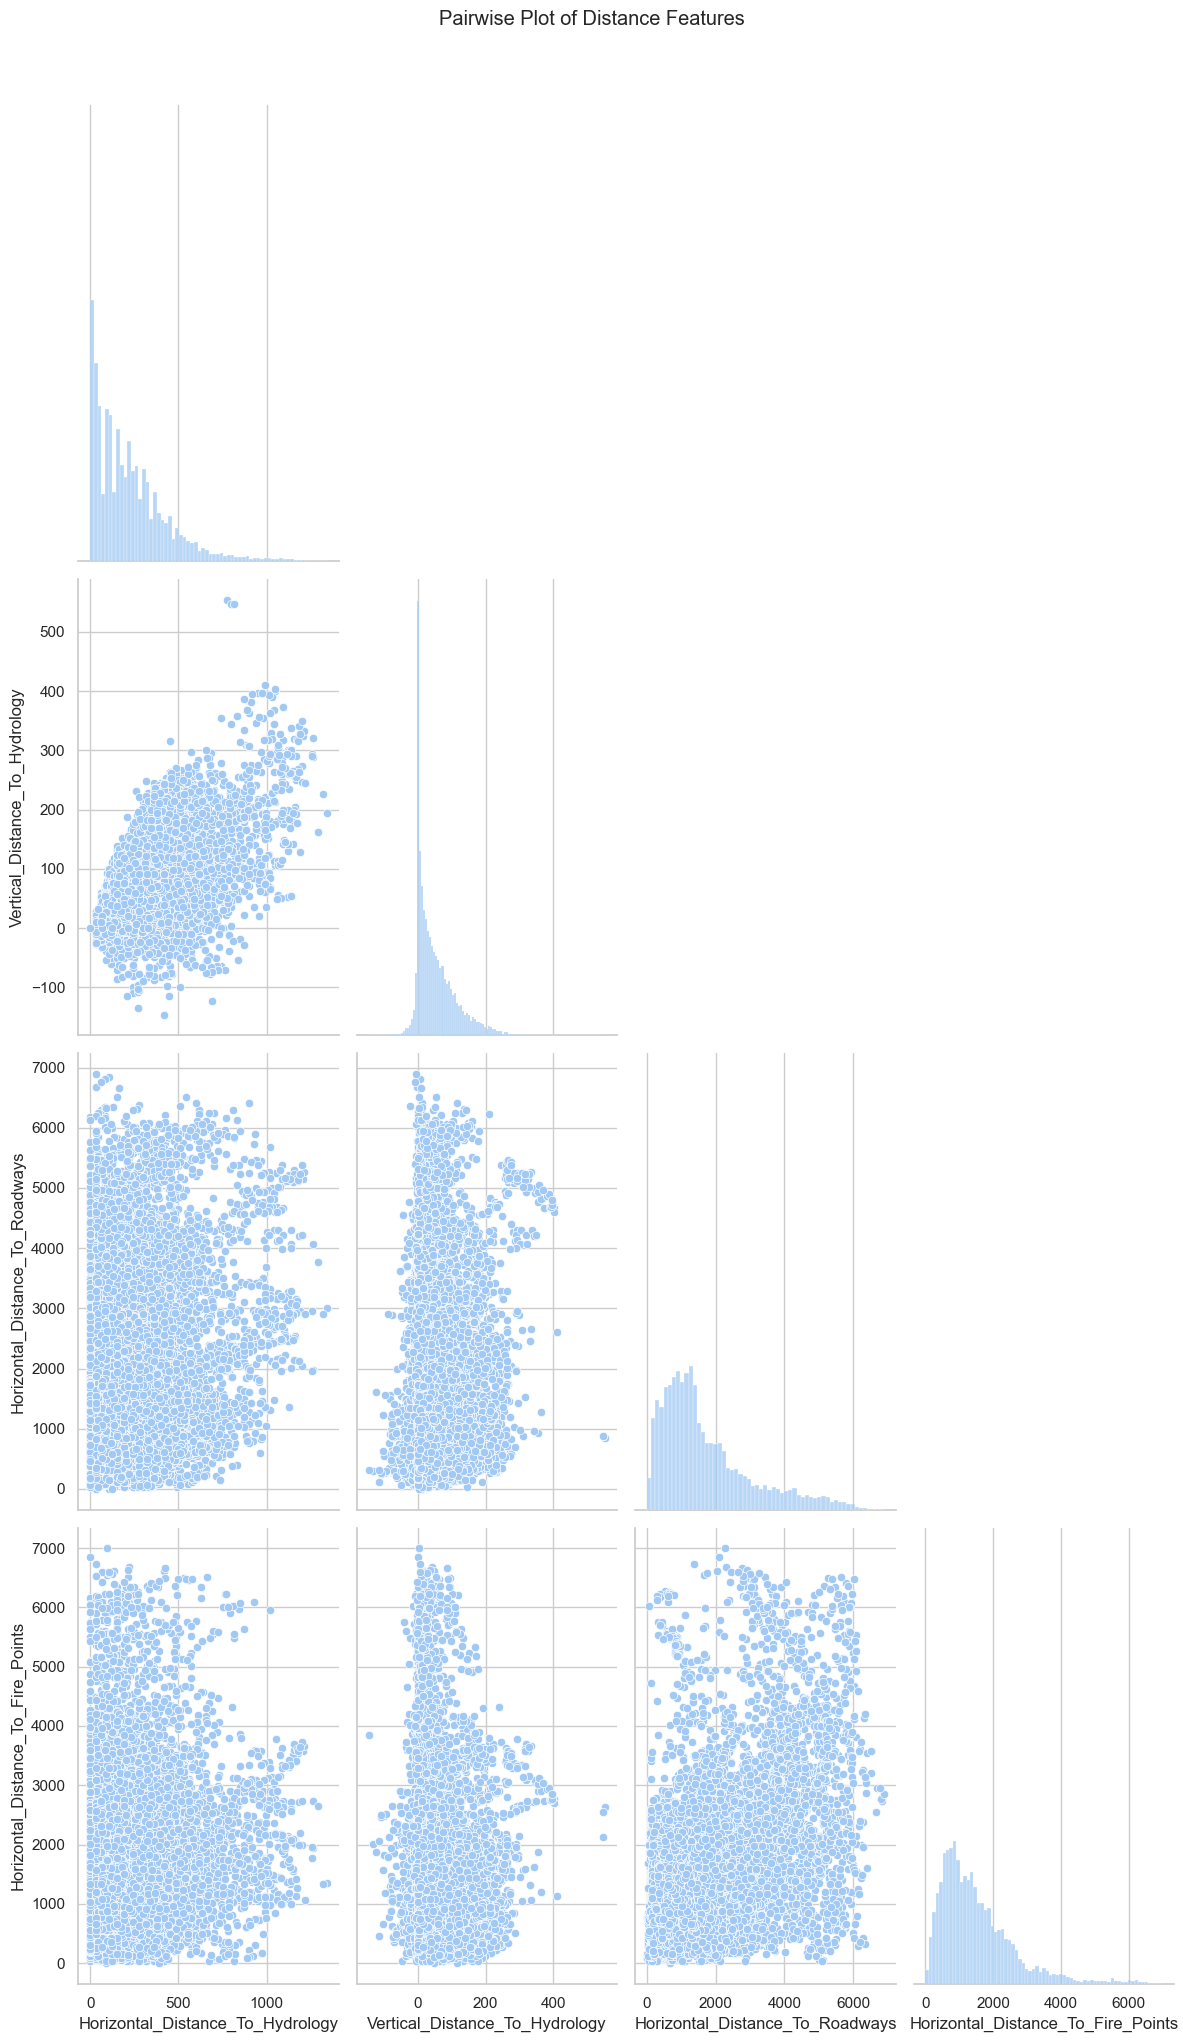

In [75]:
distance_features = [
    'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points',
]

# Create the pairplot with size 
plot = sns.pairplot(forest[distance_features], corner=True, diag_kind='hist')
plot.fig.set_size_inches(12, 20)  # Set figure size
plot.fig.suptitle("Pairwise Plot of Distance Features", y=1.02)
plt.tight_layout()
plt.show()

# Label encoder

In [80]:
# Encoding target variable ('Cover_Type') using LabelEncoder
le = LabelEncoder()
forest['Cover_Type'] = le.fit_transform(forest['Cover_Type'])

In [84]:
#Split the data into features and target
X = forest.drop(columns=['Id', 'Cover_Type']) 
y = forest['Cover_Type']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [90]:
#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#  ml model implimentation

In [93]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [95]:
y_pred = rf_model.predict(X_test)


In [97]:
# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8713624338624338
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78       421
           1       0.82      0.71      0.76       438
           2       0.83      0.83      0.83       428
           3       0.93      0.98      0.96       449
           4       0.89      0.96      0.92       416
           5       0.87      0.86      0.86       432
           6       0.95      0.97      0.96       440

    accuracy                           0.87      3024
   macro avg       0.87      0.87      0.87      3024
weighted avg       0.87      0.87      0.87      3024



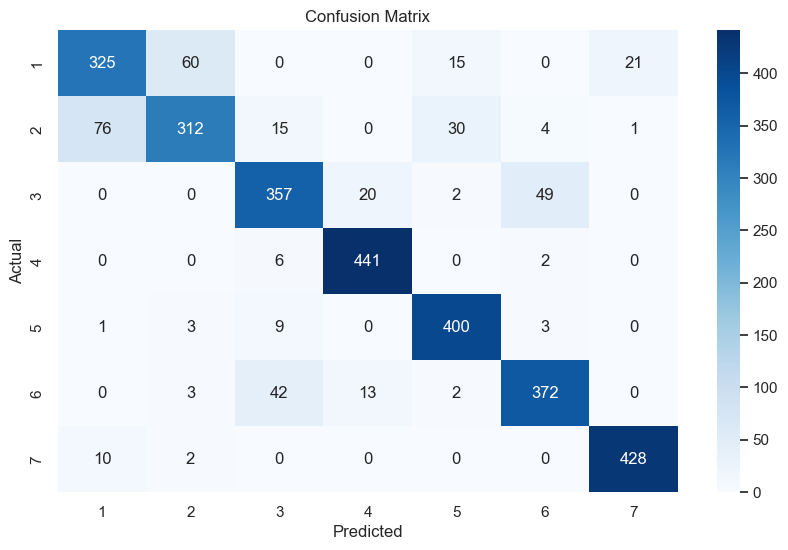

In [99]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Hyperparameter Tuning 

In [102]:
# Hyperparameter Tuning (Optional)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}


In [104]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [105]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}


In [106]:

# Retrain the model with the best parameters
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

# Final evaluation with the best model
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Model Classification Report:\n", classification_report(y_test, y_pred_best))

Best Model Accuracy: 0.8733465608465608
Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78       421
           1       0.83      0.71      0.77       438
           2       0.85      0.83      0.84       428
           3       0.93      0.98      0.96       449
           4       0.89      0.96      0.92       416
           5       0.85      0.87      0.86       432
           6       0.95      0.97      0.96       440

    accuracy                           0.87      3024
   macro avg       0.87      0.87      0.87      3024
weighted avg       0.87      0.87      0.87      3024

